# Prototyping notebook
* Load jpg frames of RHEED movie

TODO:
* pre-process jpgs for entry into Molar

In [2]:
%load_ext autoreload
%autoreload 2

In [6]:
%matplotlib inline

In [5]:
import numpy as np
import scipy
import cv2
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

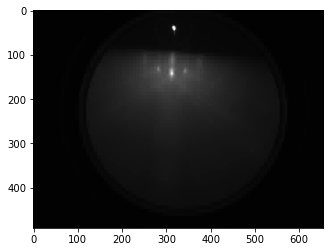

In [9]:
filepath = 'data/c01_0100.jpg'
photo = cv2.imread(filepath)
photo1 = cv2.cvtColor(photo, cv2.COLOR_BGR2GRAY)
crop_photo = photo1[0:-1, 0:-1]
plt.imshow(crop_photo, cmap = "gray")